# Microsoft Movie Studio Data Analysis

**Author:** Jimmy Mumo
***


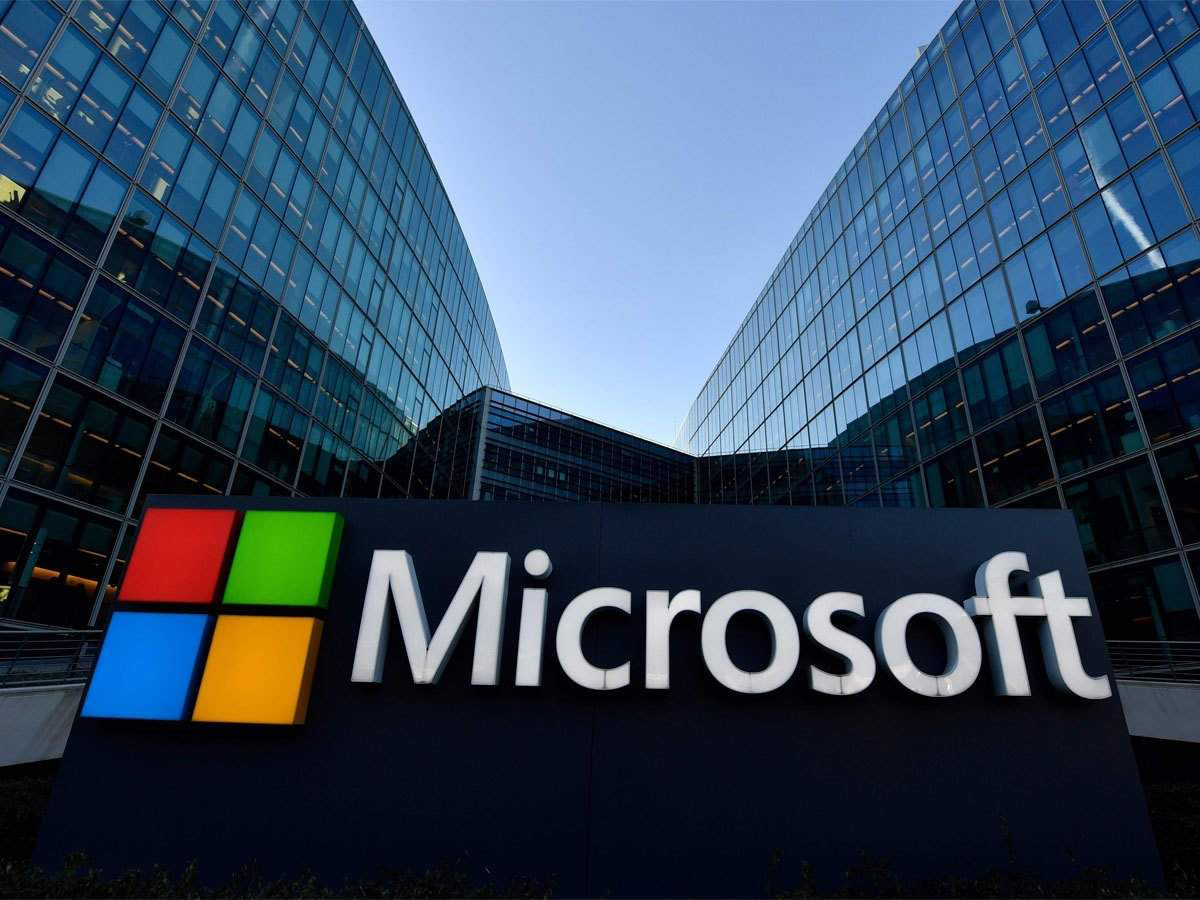

In [40]:
from PIL import Image
import IPython.display as display

image_path = 'microsoft.jpg'
pic = Image.open(image_path)
display.display(pic)

## Overview

This project aims to help the company Microsoft enter into the movie industry by giving market insights. It aims to look at what types of movies are doing well at the box office so that Microsoft can look into the current trends and see what the market is responding well to. Once having identified the key trends, the company can then move forward and decide on what content they should be putting out in order to have a share of the movie industry success.

## Business Problem

Microsoft intends to venture into the film industry by forming a new movie studio. However, to do this they require insights on what films in particular perform well at the box office. These insights will allow them to make informed decisions on what content they should produce and thus maximising profitability and audience engagement.


## Data Understanding



The data from this project is sourced from Box Office Mojo, The Movie Database, The Numbers and ROtten Tomatoes. The unique datasets were joined together using the movie ids.

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


%matplotlib inline

Working with individual datasets:
## 1. Box Office Mojo

In [3]:
bomMovie_df = pd.read_csv("bom.movie_gross.csv")
bomMovie_df.head()

title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010

## 2. The Movie Database



In [4]:
tmdb_df = pd.read_csv("tmdb.movies.csv")
tmdb_df.head()

Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                      How to Train Your Dragon           7.7        7610  
2                                    Iron Man 2           6.8       12368  
3                                     Toy Story           7.9       10174  
4                                     Inception           8.3       22186

## 3. The Numbers

In [5]:
tn_df = pd.read_csv('tn.movie_budgets.csv')
tn_df.head()

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747

## 4. Rotten Tomatoes

In [6]:
# initiating a path to the zipped movie info file

rt_path = 'rt.movie_info.tsv'

rt_movie = pd.read_csv(rt_path, sep='\t')

rt_movie.head()

id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                            writer  theater_date      dvd_date currency  \
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
2                   Allison Anders  Sep 13, 1996  Apr 18, 2000      NaN   
3  Paul Attanasio|Michael Crichton   Dec 9, 1994  Aug 27, 1997      NaN   
4                     Giles Cooper           NaN           NaN      NaN   

  box_office      runtime             studio  
0        NaN  104 minutes                NaN  
1    600,000  108 minutes  Entertainment One  
2        NaN  116 minutes                NaN  
3        NaN  128 minutes                NaN  
4        NaN  200 minutes                NaN

The same process is done with the rotten tomatoes reviews 

In [7]:
rt_path = 'rt.reviews.tsv'

rt_reviews = pd.read_csv(rt_path, sep='\t')

rt_reviews.head()

id                                             review rating   fresh  \
0   3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1   3  It's an allegory in search of a meaning that n...    NaN  rotten   
2   3  ... life lived in a bubble in financial dealin...    NaN   fresh   
3   3  Continuing along a line introduced in last yea...    NaN   fresh   
4   3             ... a perverse twist on neorealism...     NaN   fresh   

           critic  top_critic         publisher               date  
0      PJ Nabarro           0   Patrick Nabarro  November 10, 2018  
1  Annalee Newitz           0           io9.com       May 23, 2018  
2    Sean Axmaker           0  Stream on Demand    January 4, 2018  
3   Daniel Kasman           0              MUBI  November 16, 2017  
4             NaN           0      Cinema Scope   October 12, 2017

In [8]:
rt_movie.info()
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 n

## 5. IMDB

In [9]:
# listing the tables within the dataset by initiating a connection to the sql library

with sqlite3.connect('im.db') as conn:
    cur = conn.cursor()
    cur.execute("""
                SELECT name FROM sqlite_master WHERE type = 'table' ;
                 """ )

tables = cur.fetchall()
for table in tables:
    print(table)

('movie_basics',)
('directors',)
('known_for',)
('movie_akas',)
('movie_ratings',)
('persons',)
('principals',)
('writers',)


In [10]:
#initiate a path to the SQLite database 
db_path = 'im.db' 

#initiate a connection to the SQLite database
conn = sqlite3.connect(db_path)

# Read the individual relevant items into DataFrames
movie_basics_df = pd.read_sql_query("SELECT * FROM movie_basics ;", conn)
movie_ratings_df = pd.read_sql_query("SELECT * FROM movie_ratings ;", conn)
movie_akas_df = pd.read_sql_query("SELECT * FROM movie_akas ;", conn)
print(f'Movie Basics Data:\n,  {movie_basics_df.head()}' )
print(f'Movie Ratings Data: \n, {movie_ratings_df.head()}')
print(f'Movie Akas Data: \n {movie_akas_df.head()}')


Movie Basics Data:
,      movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  
Movie Ratings Data: 
,      movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt

In [11]:
print(f'{movie_basics_df.head()}')
print(f'{bomMovie_df.head()} ')


    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334

## Data Preparation

In this stage, the data is preprocessed and cleaned in order to make it suitable for analysis. This ensures that the data is of a higher quality and thus will help in the process of getting insights and thus aiding the Microsoft movie studio make more informed decisions.

In [12]:
# Data cleaning
# showing info for each dataset
bomMovie_df.info() 
tmdb_df.info()
tn_df.info()
rt_movie.info()
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date     

From the above cell, the data is found to have missing values. This issue is handled in the following cell.

In [13]:
# Removal of duplicate values
bomMovie_df.drop_duplicates()
tmdb_df.drop_duplicates()
tn_df.drop_duplicates()
rt_movie.drop_duplicates()
rt_reviews.drop_duplicates()

id                                             review rating   fresh  \
0         3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1         3  It's an allegory in search of a meaning that n...    NaN  rotten   
2         3  ... life lived in a bubble in financial dealin...    NaN   fresh   
3         3  Continuing along a line introduced in last yea...    NaN   fresh   
4         3             ... a perverse twist on neorealism...     NaN   fresh   
...     ...                                                ...    ...     ...   
54427  2000  The real charm of this trifle is the deadpan c...    NaN   fresh   
54428  2000                                                NaN    1/5  rotten   
54429  2000                                                NaN    2/5  rotten   
54430  2000                                                NaN  2.5/5  rotten   
54431  2000                                                NaN    3/5   fresh   

                  critic  top_critic         publisher                date  
0             PJ Nabarro           0   Patrick Nabarro   November 10, 2018  
1         Annalee Newitz           0           io9.com        May 23, 2018  
2           Sean Axmaker           0  Stream on Demand     January 4, 2018  
3          Daniel Kasman           0              MUBI   November 16, 2017  
4                    NaN           0      Cinema Scope    October 12, 2017  
...                  ...         ...               ...                 ...  
54427      Laura Sinagra           1     Village Voice  September 24, 2002  
54428  Michael Szymanski           0        Zap2it.com  September 21, 2005  
54429       Emanuel Levy           0   EmanuelLevy.Com       July 17, 2005  
54430   Christopher Null           0    Filmcritic.com   September 7, 2003  
54431    Nicolas Lacroix           0      Showbizz.net   November 12, 2002  

[54423 rows x 8 columns]

In [14]:
# Handling missing values
bomMovie_df.dropna(inplace=True)
tmdb_df.dropna
tn_df.dropna
rt_movie.dropna(inplace=True)
rt_reviews.dropna(inplace=True)

In [15]:
bomMovie_df.info()
tmdb_df.info()
tn_df.info()
rt_movie.info()
rt_reviews.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       2651

In [16]:
#merging the relevant IMDB tables

merged_imdb_df = pd.merge(movie_basics_df, movie_ratings_df,  how='inner', on='movie_id')
merged_imdb_df = pd.merge(merged_imdb_df, movie_akas_df, how='inner', on='movie_id')
merged_imdb_df.head()

movie_id primary_title original_title  start_year  runtime_minutes  \
0  tt0063540     Sunghursh      Sunghursh        2013            175.0   
1  tt0063540     Sunghursh      Sunghursh        2013            175.0   
2  tt0063540     Sunghursh      Sunghursh        2013            175.0   
3  tt0063540     Sunghursh      Sunghursh        2013            175.0   
4  tt0063540     Sunghursh      Sunghursh        2013            175.0   

               genres  averagerating  numvotes  ordering      title region  \
0  Action,Crime,Drama            7.0        77         1  Sangharsh     IN   
1  Action,Crime,Drama            7.0        77         2  Sunghursh   None   
2  Action,Crime,Drama            7.0        77         3  Sunghursh     IN   
3  Action,Crime,Drama            7.0        77         4  Sunghursh     IN   
4  Action,Crime,Drama            7.0        77         5  Sungharsh     IN   

  language     types                   attributes  is_original_title  
0       hi      None  alternative transliteration                0.0  
1     None  original                         None                1.0  
2     None      None                         None                0.0  
3       hi      None  alternative transliteration                0.0  
4       hi      None         alternative spelling                0.0

In [17]:
#investigate missing values of the merged imdb

merged_imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261806 entries, 0 to 261805
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           261806 non-null  object 
 1   primary_title      261806 non-null  object 
 2   original_title     261806 non-null  object 
 3   start_year         261806 non-null  int64  
 4   runtime_minutes    250553 non-null  float64
 5   genres             260621 non-null  object 
 6   averagerating      261806 non-null  float64
 7   numvotes           261806 non-null  int64  
 8   ordering           261806 non-null  int64  
 9   title              261806 non-null  object 
 10  region             218341 non-null  object 
 11  language           37080 non-null   object 
 12  types              153268 non-null  object 
 13  attributes         12924 non-null   object 
 14  is_original_title  261806 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 30

The above cell reveals there are missing values in the run-time and genres columns. to resolve this the missing values are dropped

In [18]:
merged_imdb_df.dropna()

merged_imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261806 entries, 0 to 261805
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           261806 non-null  object 
 1   primary_title      261806 non-null  object 
 2   original_title     261806 non-null  object 
 3   start_year         261806 non-null  int64  
 4   runtime_minutes    250553 non-null  float64
 5   genres             260621 non-null  object 
 6   averagerating      261806 non-null  float64
 7   numvotes           261806 non-null  int64  
 8   ordering           261806 non-null  int64  
 9   title              261806 non-null  object 
 10  region             218341 non-null  object 
 11  language           37080 non-null   object 
 12  types              153268 non-null  object 
 13  attributes         12924 non-null   object 
 14  is_original_title  261806 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 30

In [19]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33988 entries, 0 to 54424
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          33988 non-null  int64 
 1   review      33988 non-null  object
 2   rating      33988 non-null  object
 3   fresh       33988 non-null  object
 4   critic      33988 non-null  object
 5   top_critic  33988 non-null  int64 
 6   publisher   33988 non-null  object
 7   date        33988 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.3+ MB


In [20]:
#merging bomMovie and tmbd, tn and rt
merge_df = pd.merge(tmdb_df, bomMovie_df, how='inner', on='title' )
merge_df = pd.merge(merge_df, tn_df, how='inner', left_on='title', right_on='movie', suffixes=('_merge', '_tn'))


#dropping the tn values

columns_to_remove = ['id_tn', 'release_date_tn', 'domestic_gross_tn', 'worldwide_gross']

# Drop the specified columns
merge_df = merge_df.drop(columns=columns_to_remove, errors='ignore')

# removing the 'merge' suffix
merge_df = merge_df.rename(columns=lambda x: x.replace('_merge', ''))

merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1197 non-null   int64  
 1   genre_ids          1197 non-null   object 
 2   id                 1197 non-null   int64  
 3   original_language  1197 non-null   object 
 4   original_title     1197 non-null   object 
 5   popularity         1197 non-null   float64
 6   release_date       1197 non-null   object 
 7   title              1197 non-null   object 
 8   vote_average       1197 non-null   float64
 9   vote_count         1197 non-null   int64  
 10  studio             1197 non-null   object 
 11  domestic_gross     1197 non-null   float64
 12  foreign_gross      1197 non-null   object 
 13  year               1197 non-null   int64  
 14  movie              1197 non-null   object 
 15  production_budget  1197 non-null   object 
dtypes: float64(3), int64(4),

In [21]:
merge_df['genre_ids'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 1197 entries, 0 to 1196
Series name: genre_ids
Non-Null Count  Dtype 
--------------  ----- 
1197 non-null   object
dtypes: object(1)
memory usage: 9.5+ KB


# Genre Data
The merged data has IDs as genres rather than the actual genre names. The actual genre names were retrieved from the website themoviedb.

In [22]:
genres_dict = { 
    12: 'Adventure', 14: 'Fantasy', 16: 'Animation',
    18: 'Drama', 27: 'Horror', 28: 'Action',
    35: 'Comedy', 36: 'History', 37: 'Western',
    53: 'Thriller', 80: 'Crime', 99: 'Documentary',
    10751: 'Family', 10752: 'War', 10749: 'Romance',
    878: 'Science Fiction', 9648: 'Mystery', 10402: 'Music',
    10770: 'TV Movie'
}

In [23]:
print(merge_df.columns)


Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'studio', 'domestic_gross', 'foreign_gross', 'year', 'movie',
       'production_budget'],
      dtype='object')


In [24]:
merge_df.head()

Unnamed: 0            genre_ids     id original_language  \
0           1  [14, 12, 16, 10751]  10191                en   
1           2        [12, 28, 878]  10138                en   
2           4        [28, 878, 12]  27205                en   
3           7      [16, 10751, 35]  10193                en   
4           8      [16, 10751, 35]  20352                en   

             original_title  popularity release_date  \
0  How to Train Your Dragon      28.734   2010-03-26   
1                Iron Man 2      28.515   2010-05-07   
2                 Inception      27.920   2010-07-16   
3               Toy Story 3      24.445   2010-06-17   
4             Despicable Me      23.673   2010-07-09   

                      title  vote_average  vote_count studio  domestic_gross  \
0  How to Train Your Dragon           7.7        7610   P/DW     217600000.0   
1                Iron Man 2           6.8       12368   Par.     312400000.0   
2                 Inception           8.3       22186     WB     292600000.0   
3               Toy Story 3           7.7        8340     BV     415000000.0   
4             Despicable Me           7.2       10057   Uni.     251500000.0   

  foreign_gross  year                     movie production_budget  
0     277300000  2010  How to Train Your Dragon      $165,000,000  
1     311500000  2010                Iron Man 2      $170,000,000  
2     535700000  2010                 Inception      $160,000,000  
3     652000000  2010               Toy Story 3      $200,000,000  
4     291600000  2010             Despicable Me       $69,000,000

In [25]:
# Explode the 'genre_ids' column to get individual genres for each movie
merge_df['genre_ids'] = merge_df['genre_ids'].apply(lambda x: x.strip("[]").split(", ") if isinstance(x, str) else [])
merge_exploded = merge_df.explode('genre_ids')

# Check for missing or incorrect values in 'genre_ids'
unique_genre_ids = merge_exploded['genre_ids'].unique()
print("Unique values in 'genre_ids':", unique_genre_ids)

# Check for missing or incorrect values in other columns
print("Null values in DataFrame:")
print(merge_exploded.isnull().sum())

# Check data types
print("Data types in DataFrame:")
print(merge_exploded.dtypes)

# Check for whitespace
print("Whitespace in 'genre_ids':", merge_exploded['genre_ids'].str.contains('\s').any())

# Check for empty lists in 'genre_ids'
empty_lists = merge_exploded['genre_ids'].apply(lambda x: len(x) == 0 if isinstance(x, list) else False)
print("Empty lists in 'genre_ids':", empty_lists.any())


Unique values in 'genre_ids': ['14' '12' '16' '10751' '28' '878' '35' '53' '18' '10749' '9648' '80' '27'
 '99' '37' '10752' '10402' '36' '' '10770']
Null values in DataFrame:
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
studio               0
domestic_gross       0
foreign_gross        0
year                 0
movie                0
production_budget    0
dtype: int64
Data types in DataFrame:
Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
studio                object
domestic_gross       float64
foreign_gross         object
year                   int64
movie        

In [26]:
# Replace genre IDs with genre names using the dictionary
merge_exploded['genre_ids'] = merge_exploded['genre_ids'].replace(genres_dict)

# Display relevant columns
print(merge_exploded[['genre_ids', 'popularity']])


     genre_ids  popularity
0           14      28.734
0           12      28.734
0           16      28.734
0        10751      28.734
1           12      28.515
...        ...         ...
1195        28       9.371
1195        80       9.371
1196        28       2.707
1196        12       2.707
1196        16       2.707

[3101 rows x 2 columns]


In [27]:
merge_exploded['genre_ids']

0          14
0          12
0          16
0       10751
1          12
        ...  
1195       28
1195       80
1196       28
1196       12
1196       16
Name: genre_ids, Length: 3101, dtype: object

In [28]:
# Add a new column 'genre_names' with corresponding names from the dictionary
merge_exploded['genre_names'] = merge_exploded['genre_ids'].map(lambda x: genres_dict.get(int(x) if x.strip().isdigit() else 'Unknown'))


# Display the DataFrame with the new 'genre_names' column
merge_exploded.head()

Unnamed: 0 genre_ids     id original_language            original_title  \
0           1        14  10191                en  How to Train Your Dragon   
0           1        12  10191                en  How to Train Your Dragon   
0           1        16  10191                en  How to Train Your Dragon   
0           1     10751  10191                en  How to Train Your Dragon   
1           2        12  10138                en                Iron Man 2   

   popularity release_date                     title  vote_average  \
0      28.734   2010-03-26  How to Train Your Dragon           7.7   
0      28.734   2010-03-26  How to Train Your Dragon           7.7   
0      28.734   2010-03-26  How to Train Your Dragon           7.7   
0      28.734   2010-03-26  How to Train Your Dragon           7.7   
1      28.515   2010-05-07                Iron Man 2           6.8   

   vote_count studio  domestic_gross foreign_gross  year  \
0        7610   P/DW     217600000.0     277300000  2010   
0        7610   P/DW     217600000.0     277300000  2010   
0        7610   P/DW     217600000.0     277300000  2010   
0        7610   P/DW     217600000.0     277300000  2010   
1       12368   Par.     312400000.0     311500000  2010   

                      movie production_budget genre_names  
0  How to Train Your Dragon      $165,000,000     Fantasy  
0  How to Train Your Dragon      $165,000,000   Adventure  
0  How to Train Your Dragon      $165,000,000   Animation  
0  How to Train Your Dragon      $165,000,000      Family  
1                Iron Man 2      $170,000,000   Adventure

In [29]:
# Add a new column 'genre_names' with corresponding names from the dictionary
merge_exploded['genre_names'] = merge_exploded['genre_ids'].map(lambda x: genres_dict.get(int(x) if not pd.isna(x) and x.strip().isdigit() else np.nan, 'Unknown'))


# Display the DataFrame with the new 'genre_names' column
merge_exploded.head()


Unnamed: 0 genre_ids     id original_language            original_title  \
0           1        14  10191                en  How to Train Your Dragon   
0           1        12  10191                en  How to Train Your Dragon   
0           1        16  10191                en  How to Train Your Dragon   
0           1     10751  10191                en  How to Train Your Dragon   
1           2        12  10138                en                Iron Man 2   

   popularity release_date                     title  vote_average  \
0      28.734   2010-03-26  How to Train Your Dragon           7.7   
0      28.734   2010-03-26  How to Train Your Dragon           7.7   
0      28.734   2010-03-26  How to Train Your Dragon           7.7   
0      28.734   2010-03-26  How to Train Your Dragon           7.7   
1      28.515   2010-05-07                Iron Man 2           6.8   

   vote_count studio  domestic_gross foreign_gross  year  \
0        7610   P/DW     217600000.0     277300000  2010   
0        7610   P/DW     217600000.0     277300000  2010   
0        7610   P/DW     217600000.0     277300000  2010   
0        7610   P/DW     217600000.0     277300000  2010   
1       12368   Par.     312400000.0     311500000  2010   

                      movie production_budget genre_names  
0  How to Train Your Dragon      $165,000,000     Fantasy  
0  How to Train Your Dragon      $165,000,000   Adventure  
0  How to Train Your Dragon      $165,000,000   Animation  
0  How to Train Your Dragon      $165,000,000      Family  
1                Iron Man 2      $170,000,000   Adventure

# Data Analysis and Modelling


 Genre Analysis

In [30]:
#finding the top genres

top_genres = merge_exploded[['genre_ids', 'genre_names', 'popularity', 'vote_count']]

top_genres

genre_ids genre_names  popularity  vote_count
0           14     Fantasy      28.734        7610
0           12   Adventure      28.734        7610
0           16   Animation      28.734        7610
0        10751      Family      28.734        7610
1           12   Adventure      28.515       12368
...        ...         ...         ...         ...
1195        28      Action       9.371         259
1195        80       Crime       9.371         259
1196        28      Action       2.707          54
1196        12   Adventure       2.707          54
1196        16   Animation       2.707          54

[3101 rows x 4 columns]

# Profit Calculation

Looking into which movies are profitable and hence would serve the new studio well in terms of seeing return on investments early on.

In [31]:
# Check unique values in 'production_budget'
print(tn_df['production_budget'].head())
print(tn_df.dtypes)
print(tn_df.info())


0    $425,000,000
1    $410,600,000
2    $350,000,000
3    $330,600,000
4    $317,000,000
Name: production_budget, dtype: object
id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


In [32]:
# Remove commas and other non-numeric characters, then convert to numeric
tn_df['production_budget'] = tn_df['production_budget'].replace('[\$,]', '', regex=True).astype(float)
tn_df['production_budget'] = pd.to_numeric(tn_df['production_budget'], errors='coerce')
#print(tn_df['production_budget'].info())
#print(tn_df['production_budget'].head())
tn_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   object 
 5   worldwide_gross    5782 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 271.2+ KB


In [33]:
merge_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3101 entries, 0 to 1196
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3101 non-null   int64  
 1   genre_ids          3101 non-null   object 
 2   id                 3101 non-null   int64  
 3   original_language  3101 non-null   object 
 4   original_title     3101 non-null   object 
 5   popularity         3101 non-null   float64
 6   release_date       3101 non-null   object 
 7   title              3101 non-null   object 
 8   vote_average       3101 non-null   float64
 9   vote_count         3101 non-null   int64  
 10  studio             3101 non-null   object 
 11  domestic_gross     3101 non-null   float64
 12  foreign_gross      3101 non-null   object 
 13  year               3101 non-null   int64  
 14  movie              3101 non-null   object 
 15  production_budget  3101 non-null   object 
 16  genre_names        3101 non-n

In [34]:
# Evaluating Profit
# Converting to numeric to handle errors
merge_exploded['foreign_gross'] = pd.to_numeric(merge_exploded['foreign_gross'], errors='coerce')
merge_exploded['domestic_gross'] = pd.to_numeric(merge_exploded['domestic_gross'], errors='coerce')
merge_exploded['production_budget'] = pd.to_numeric(merge_exploded['production_budget'].replace('[\$,]', '', regex=True).astype(float))
merge_exploded.dropna(inplace=True)

# Calculate worldwide gross
merge_exploded['worldwide_gross'] = merge_exploded['domestic_gross'] + merge_exploded['foreign_gross']



# Calculate profitability using the stored original values
merge_exploded['profitability'] = (merge_exploded['worldwide_gross'] - merge_exploded['production_budget']) / merge_exploded['production_budget'] * 100

# Display the relevant columns
#print(merge_exploded[['original_title', 'worldwide_gross', 'production_budget', 'profitability']])

merge_exploded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3088 entries, 0 to 1196
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3088 non-null   int64  
 1   genre_ids          3088 non-null   object 
 2   id                 3088 non-null   int64  
 3   original_language  3088 non-null   object 
 4   original_title     3088 non-null   object 
 5   popularity         3088 non-null   float64
 6   release_date       3088 non-null   object 
 7   title              3088 non-null   object 
 8   vote_average       3088 non-null   float64
 9   vote_count         3088 non-null   int64  
 10  studio             3088 non-null   object 
 11  domestic_gross     3088 non-null   float64
 12  foreign_gross      3088 non-null   float64
 13  year               3088 non-null   int64  
 14  movie              3088 non-null   object 
 15  production_budget  3088 non-null   float64
 16  genre_names        3088 non-n

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


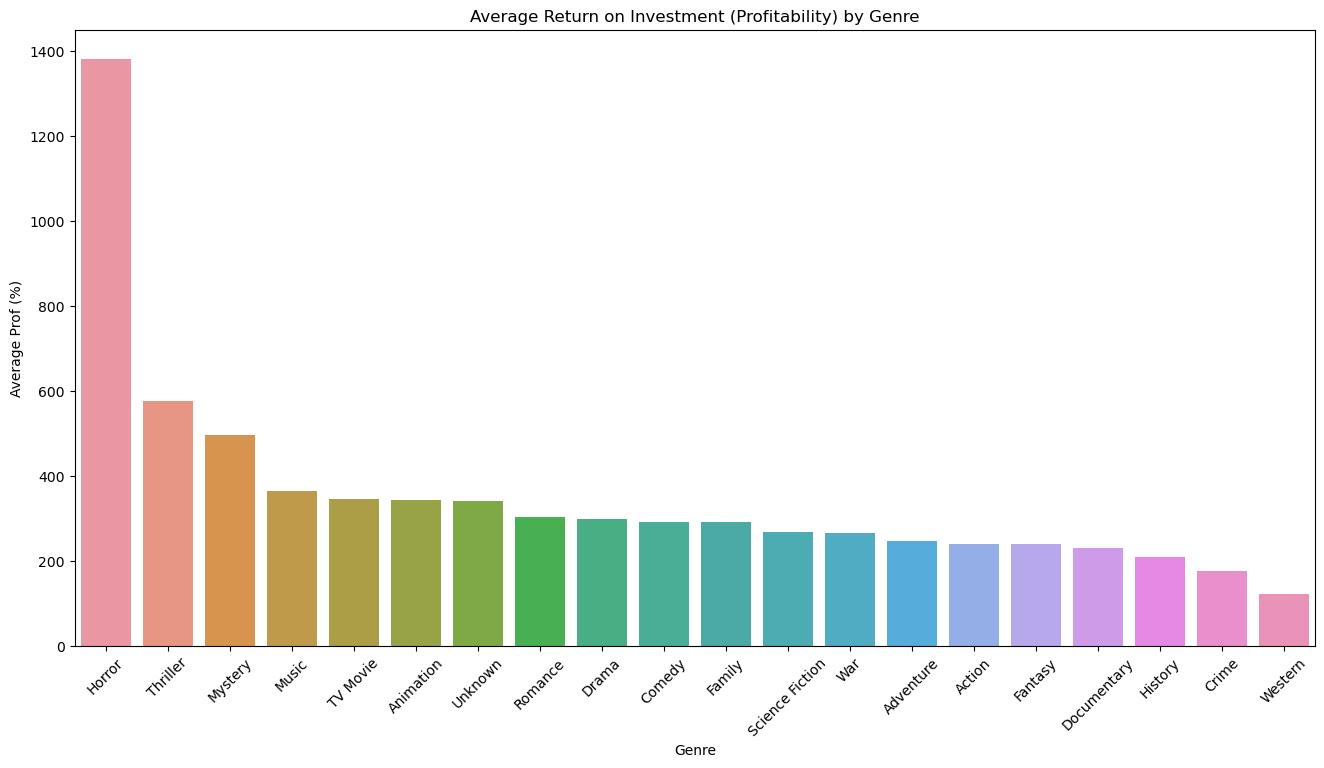

In [35]:
avg_prof_by_genre = merge_exploded.groupby('genre_names')['profitability'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(16, 8))
sns.barplot(x='genre_names', y='profitability', data=avg_prof_by_genre)
plt.title('Average Return on Investment (Profitability) by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Prof (%)')
plt.xticks(rotation=45)
plt.show()

The above graph shows the average profitability of movies for each genre.

# Popularity

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


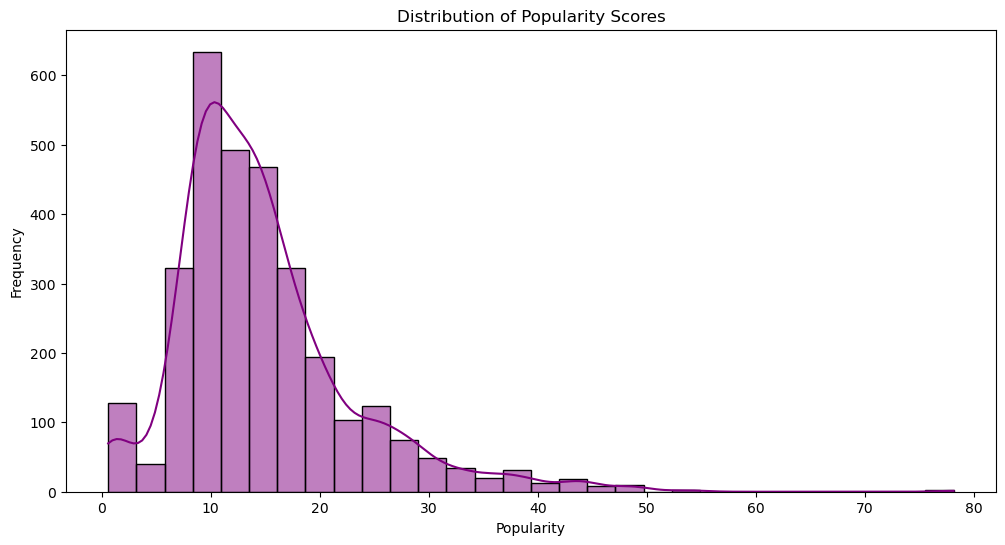

In [36]:
plt.figure(figsize=(12, 6))
sns.histplot(merge_exploded['popularity'], bins=30, kde=True, color='purple')
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

The above histogram represents the distribution of popularity scores.

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

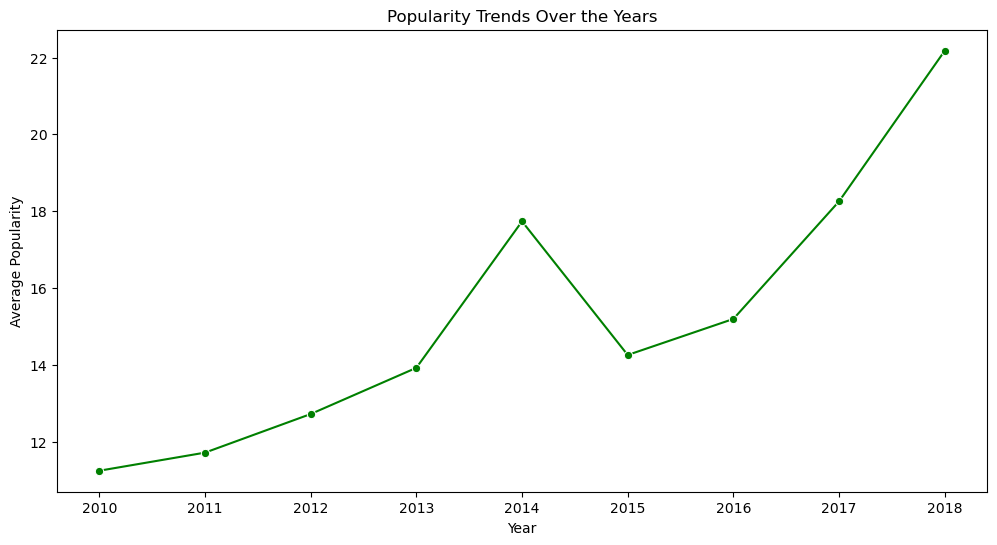

In [37]:
popularity_trends = merge_exploded.groupby('year')['popularity'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='popularity', data=popularity_trends, marker='o', color='green')
plt.title('Popularity Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.show()

# Vote Analysis

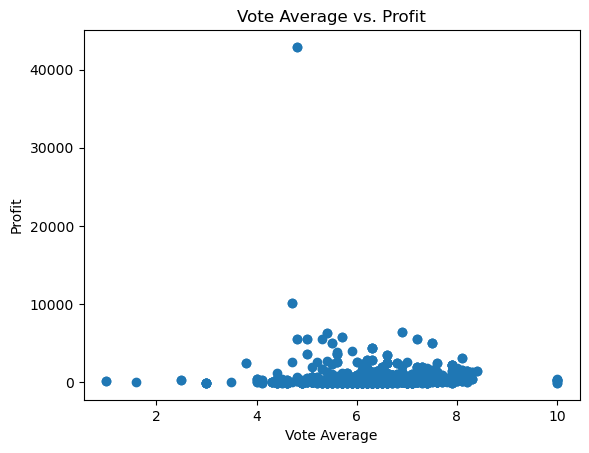

In [38]:
# Scatter plot: 'vote_average' vs. 'profit'
plt.scatter(merge_exploded['vote_average'], merge_exploded['profitability'])
plt.title('Vote Average vs. Profit')
plt.xlabel('Vote Average')
plt.ylabel('Profit')
plt.show()

The above scatter plot explores the relationship between the average vote rating and the profitability of movies.

## Evaluation

1. Profitability of the Horror Genre:

From the above analysis, the findings would suggest that the most profitable genre to start off in would be horror as there is a high return on investments. This would be attributed to the relatively lower production costs as well as positive review scores from the audience thu making the horror genre a financial success.

2. Uptick in Movie Trends:

There also seems to be an uptick in movie trends over the years so it is a very good time to invest in the industry. From the above analylsis, the movie landscape seems rife for the taking with a ready audience ready to be captivated by fresh and new voices in the movie industry. The audience is diversified and continues to grow indicating a resilient market. This indicates the prescence of an engaged audience thus creating the opportunity for a new movie studio to establish themselves

3. Timing for Investment:
The current analysis indicates that the timing is opportune for a new studio to enter the movie industry. With a positive trend in movie consumption and evolving audience preferences, there is a window of opportunity to establish a foothold in the market.

## Conclusions
The data-driven insights encourage the idea of entering the movie industry with a focus on the horror genre presents a promising opportunity for high profitability. The corresponding uptick in the industry trends further reinforces the favourable environment for new entrants.

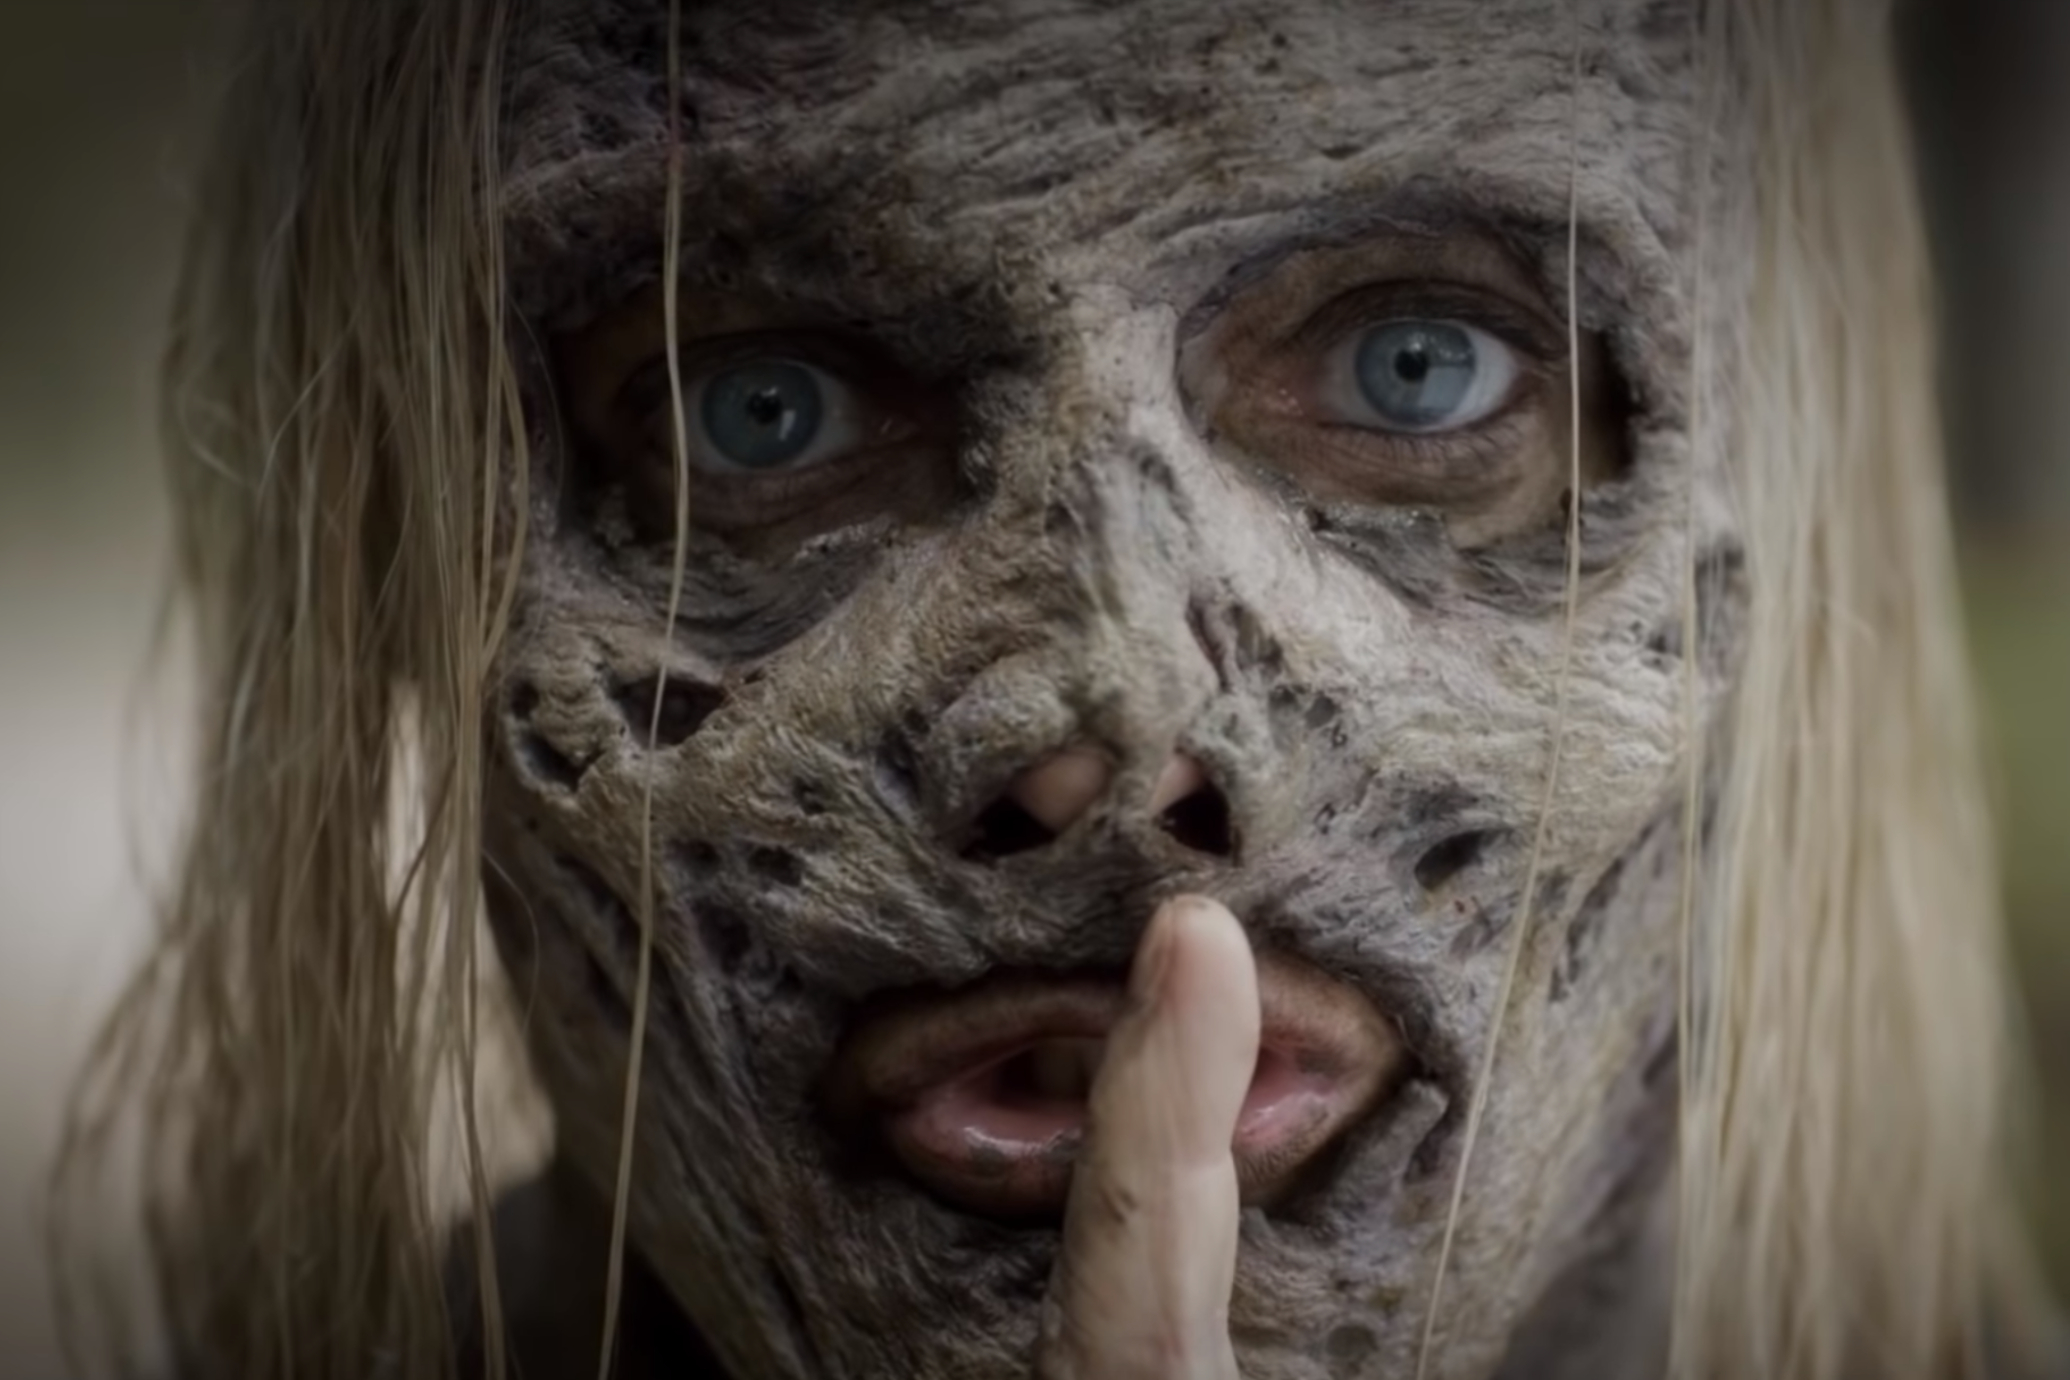

In [47]:
from PIL import Image
import IPython.display as display

image_path = 'whisperers-header-reg.jpg'
pic = Image.open(image_path)
display.display(pic)

## Final Recommendations:

1. Prioritize the horror genre for max profits.
2. Capitaloze on the current market landscape as it is a promising time to invest in the movie industry.